In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

d:\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("data/small_mnist.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df["28x19"].value_counts()

0      1996
95        1
28        1
18        1
223       1
Name: 28x19, dtype: int64

In [4]:
df.label.value_counts()

0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: label, dtype: int64

In [8]:
X = df.drop(columns=["label"]).values / 255
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 784), (400, 784), (1600,), (400,))

# Visualize Random Data

In [9]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

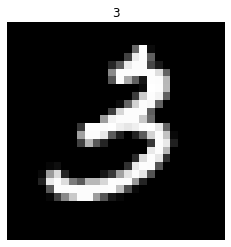

In [22]:
N = len(X_train)
idx = np.random.choice(N)
img, label = X_train[idx], y_train[idx]

plt.imshow(img.reshape(28, 28), cmap="gray")
plt.title(label)
plt.axis("off")

dl emg dirancang buat unstructured data <br> nah kalo ml itu biasanya dirancang buat yg cpt2 gitu

algo ml itu serial yg kalo pake gpu dia bakal makin lelet <br> gpu di diseng buat komputasi yg paralel. cpu buat komputasi yang serial. <br> jd kalo algo yg serial cpu kenceng ya makin lancar. <br> kebanyakan algo skitlearn itu pake nya cpu <br> tp kalo xgb itu bisa di setting pake gpu

kalo tree based, dia bisa gausah di encode kalo emg nilainya udh numeric. tp best practice nya yaa harus di encode biar dia makin cepet komputasinya

# Training

In [23]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

model = RandomizedSearchCV(pipeline, rsp.rf_params, cv=3,  n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__max_depth': 22, 'algo__max_features': 0.1185260448662222, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187}
0.999375 0.9025057795953932 0.9275


# Visualize Prediction

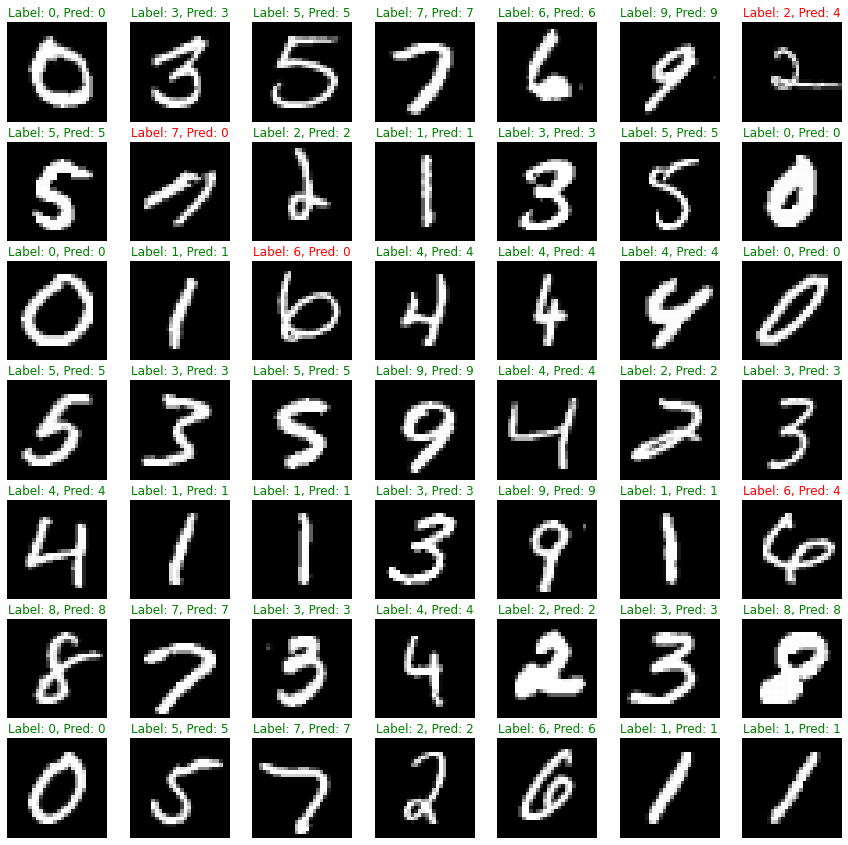

In [26]:
idx = np.random.choice(len(X_test), size=49, replace=False)
images, labels = X_test[idx], y_test[idx]
pred = model.predict(images)

fig, ax = plt.subplots(7, 7, figsize=(15, 15))
for img, label, pred, ax in zip(images, labels, pred, ax.flatten()):
    font = {"color": "green"} if label == pred else {"color": "red"}
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {label}, Pred: {pred}", fontdict=font)
    ax.axis("off")

# why it works?

IndexError: index 5 is out of bounds for axis 0 with size 5

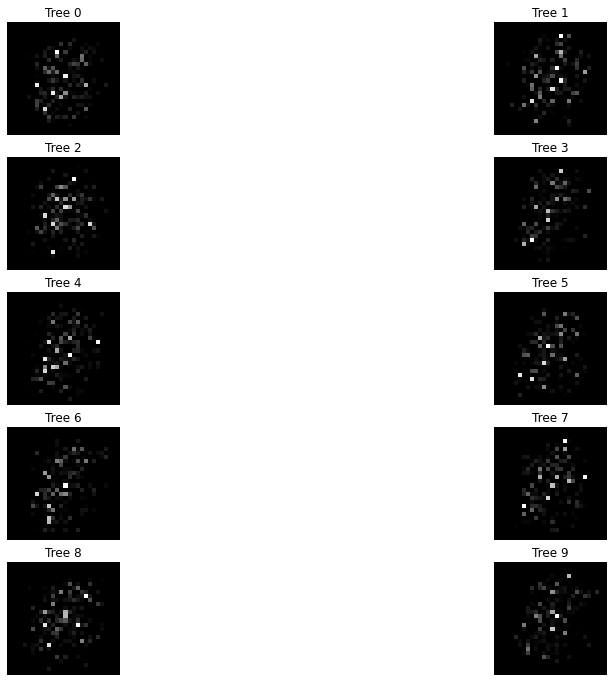

In [37]:
fig, ax = plt.subplots(5,2, figsize=(16, 12))

for idx, ex in enumerate(ax.flatten()):
    ex.imshow(model.best_estimator_.named_steps["algo"].estimators_[idx].feature_importances_.reshape(28, 28), cmap="gray")
    ex.set_title(f"Tree {idx}")
    ex.axis("off")

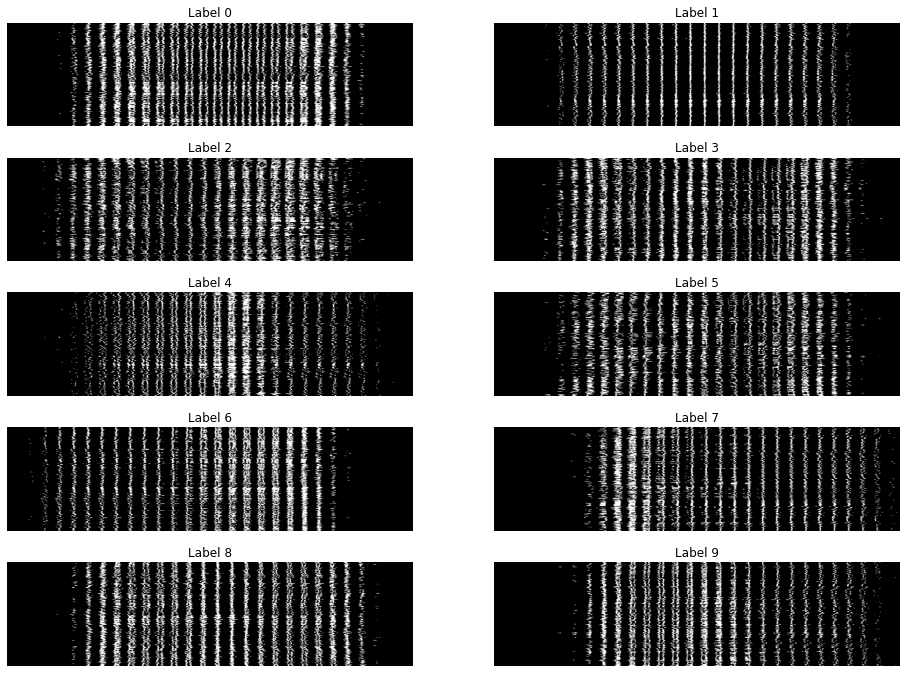

In [40]:
fig, ax = plt.subplots(5,2, figsize=(16, 12))

for idx, ex in enumerate(ax.flatten()):
    ex.imshow(df.iloc[idx*200:(idx+1)*200], cmap="gray")
    ex.set_title(f"Label {idx}")
    ex.axis("off")